# Installing Python Libraries

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 2.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Importing DataSets in MySql Workbench using connector

In [7]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='********',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = '/Users/harshitjainhj03icloud.com/Downloads/Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = 'localhost',
                            username = 'root',
                            password = '********',
                            database = 'ecommerce')

cur = db.cursor()

# 1. List all unique cities where customers are located.

In [14]:
query = "select distinct customer_city from ecommerce.customers"
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [24]:
query = "select count(order_id) from ecommerce.orders where year(order_purchase_timestamp) = 2017"
cur.execute(query)
data = cur.fetchall()
print("Total count of orders placed in 2017 is",data[0][0])

Total count of orders placed in 2017 is 45101


# 3. Find the total sales per category.

In [34]:
query = """select products.product_category, round(sum(payments.payment_value), 2)
        from ecommerce.products join ecommerce.order_items
        on products.product_id = order_items.product_id
        join ecommerce.payments
        on order_items.order_id = payments.order_id
        group by product_category
        order by product_category asc"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Total Sales"])
print(df)

                     Category  Total Sales
0                        None    252801.71
1   Agro Industria e Comercio    118730.61
2                         Art     30992.93
3             Arts and Crafts      2326.17
4                       audio     60324.62
..                        ...          ...
69           stationary store    317440.07
70            technical books     24915.44
71                  telephony    486882.05
72                       toys    619037.69
73            Watches present   1429216.68

[74 rows x 2 columns]


# 4. Calculate the percentage of orders that were paid in installments.

In [36]:
query = """ select (sum(case when payment_installments >= 1 then 1 
        else 0 end)) / count(*) * 100 
        from ecommerce.payments """
cur.execute(query)
data = cur.fetchall()
data


[(Decimal('99.9981'),)]

# 5. Count the number of customers from each state. 

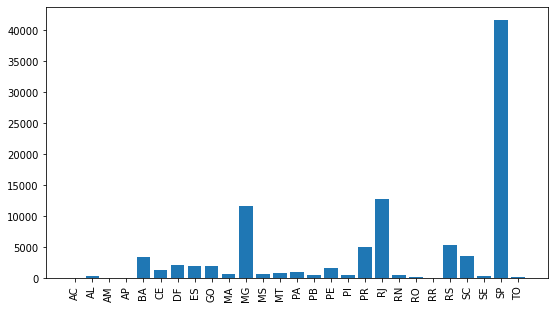

In [54]:
query = """ select customer_state, count(customer_id) 
        from ecommerce.customers 
        group by customer_state 
        order by customer_state asc """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["State", "No. of Customers"])
plt.figure(figsize = (9, 5))
plt.bar(df["State"], df["No. of Customers"])
plt.xticks(rotation = 90)
plt.show()

# 6. Calculate the number of orders per month in 2018.

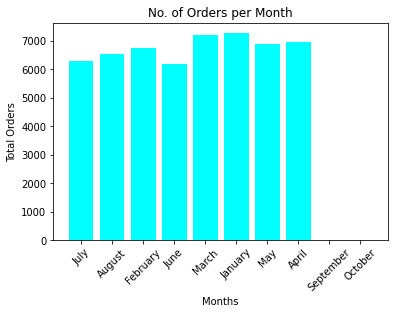

In [90]:
query = """ select monthname(order_purchase_timestamp), count(order_id) 
        from ecommerce.orders 
        where year(order_purchase_timestamp) = 2018 
        group by monthname(order_purchase_timestamp)"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Months", "No. of Orders"])
# print(df)
plt.bar(df["Months"], df["No. of Orders"], color = "cyan")
plt.xticks(rotation = 45)
plt.xlabel("Months")
plt.ylabel("Total Orders")
plt.title("No. of Orders per Month")
plt.show()

# 7. Find the average number of products per order, grouped by customer city.

In [91]:
query = """ with count_per_order as 
        (select orders.order_id, orders.customer_id, count(order_items.order_id) oc
        from orders join order_items
        on orders.order_id = order_items.order_id
        group by orders.order_id, orders.customer_id)
        
        select customers.customer_city, round(avg(count_per_order.oc),2)
        from count_per_order join customers
        on count_per_order.customer_id = customers.customer_id
        group by customers.customer_city"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["City", "Average Order"])
print(df.head(10))

                  City Average Order
0  sao jose dos campos          1.14
1              indaial          1.12
2         treze tilias          1.27
3            sao paulo          1.16
4       rio de janeiro          1.15
5         mario campos          1.33
6              guariba          1.00
7               cuiaba          1.20
8               franca          1.25
9                tocos          1.00


# 8. Calculate the percentage of total revenue contributed by each product category.

In [98]:
query = """select products.product_category, 
        round((sum(payments.payment_value)/(select sum(payment_value) from ecommerce.payments))*100 , 2)
        from ecommerce.products join ecommerce.order_items
        on products.product_id = order_items.product_id
        join ecommerce.payments
        on order_items.order_id = payments.order_id
        group by product_category
        order by product_category asc"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Sales Percentage"])
print(df)

                     Category  Sales Percentage
0                        None              1.58
1   Agro Industria e Comercio              0.74
2                         Art              0.19
3             Arts and Crafts              0.01
4                       audio              0.38
..                        ...               ...
69           stationary store              1.98
70            technical books              0.16
71                  telephony              3.04
72                       toys              3.87
73            Watches present              8.93

[74 rows x 2 columns]


# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [112]:
query = """ select products.product_category, count(order_items.product_id),
        round(avg(order_items.price), 2)
        from ecommerce.products join ecommerce.order_items
        on products.product_id = order_items.product_id
        group by products.product_category"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["Category", "Total Order", "Average Price"])
print(df)

import numpy as np
arr1 = df["Total Order"]
arr2 = df["Average Price"]
np.corrcoef([arr1, arr2])

                           Category  Total Order  Average Price
0                     HEALTH BEAUTY         9670         130.16
1                     sport leisure         8641         114.34
2                        Cool Stuff         3796         167.36
3              computer accessories         7827         116.51
4                   Watches present         5991         201.14
..                              ...          ...            ...
69                          flowers           33          33.64
70  Kitchen portable and food coach           15         264.57
71                  House Comfort 2           30          25.34
72       CITTE AND UPHACK FURNITURE           38         114.95
73                   cds music dvds           14          52.14

[74 rows x 3 columns]


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# 10. Calculate the total revenue generated by each seller, and rank them by revenue.

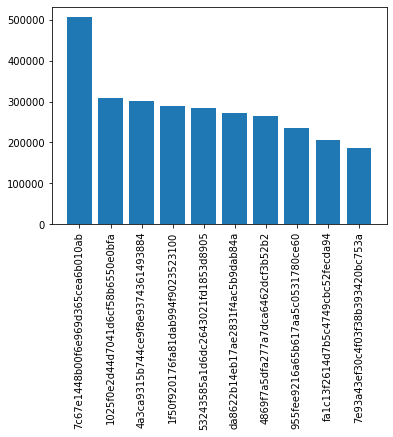

In [128]:
query = """ select * , dense_rank() over (order by revenue desc) as rn from
        (select order_items.seller_id, 
        sum(payments.payment_value) revenue
        from ecommerce.order_items join ecommerce.payments
        on order_items.order_id = payments.order_id
        group by order_items.seller_id) as a"""
cur.execute(query)
data = cur.fetchall()
# data
df = pd.DataFrame(data, columns = ["Seller ID", "Total Revenue", "Rank"])
daf = df.head(10)
plt.bar(daf["Seller ID"], daf["Total Revenue"])
plt.xticks(rotation = 90)
plt.show()

# 11. Calculate the moving average of order values for each customer over their order history.

In [138]:
query = """ select customer_id, order_purchase_timestamp, payment, 
        avg(payment) over (partition by customer_id order by order_purchase_timestamp 
        rows between 2 preceding and current row) as Moving_avg from
        (select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
        from ecommerce.orders join ecommerce.payments
        on orders.order_id = payments.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
# data
df = pd.DataFrame(data, columns = ["Customer ID", "Order Purchase Time", "Price", "mov_avg"])
print(df)

                             Customer ID  Order Purchase Time   Price  \
0       00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26  114.74   
1       000161a058600d5901f007fab4c27140  2017-07-16 09:40:32   67.41   
2       0001fd6190edaaf884bcaf3d49edf079  2017-02-28 11:06:43  195.42   
3       0002414f95344307404f0ace7a26f1d5  2017-08-16 13:09:20  179.35   
4       000379cdec625522490c315e70c7a9fb  2018-04-02 13:42:17  107.01   
...                                  ...                  ...     ...   
103881  fffecc9f79fd8c764f843e9951b11341  2018-03-29 16:59:26    0.64   
103882  fffeda5b6d849fbd39689bb92087f431  2018-05-22 13:36:02   63.13   
103883  ffff42319e9b2d713724ae527742af25  2018-06-13 16:57:05  214.13   
103884  ffffa3172527f765de70084a7e53aae8  2017-09-02 11:53:32   45.50   
103885  ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03   18.37   

           mov_avg  
0       114.739998  
1        67.410004  
2       195.419998  
3       179.350006  
4       107.010002

# 12. Calculate the cumulative sales per month for each year.

In [3]:
query = """ select year, month, payment, 
        round(sum(payment) over (order by year, month), 2) cummulative_sales from
        (select year(orders.order_purchase_timestamp) as year,
        month(orders.order_purchase_timestamp) as month, 
        round(sum(payments.payment_value), 2) as payment
        from orders join payments
        on orders.order_id = payments.order_id
        group by year, month
        order by year , month asc) as a"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ['Years', 'Months', 'Payments', 'Cummulative Sales'])
print(df)


    Years  Months    Payments  Cummulative Sales
0    2016       9      252.24             252.24
1    2016      10    59090.48           59342.72
2    2016      12       19.62           59362.34
3    2017       1   138488.04          197850.38
4    2017       2   291908.01          489758.39
5    2017       3   449863.60          939621.99
6    2017       4   417788.03         1357410.02
7    2017       5   592918.82         1950328.84
8    2017       6   511276.38         2461605.22
9    2017       7   592382.92         3053988.14
10   2017       8   674396.32         3728384.46
11   2017       9   727762.45         4456146.91
12   2017      10   779677.88         5235824.79
13   2017      11  1194882.80         6430707.59
14   2017      12   878401.48         7309109.07
15   2018       1  1115004.18         8424113.25
16   2018       2   992463.34         9416576.59
17   2018       3  1159652.12        10576228.71
18   2018       4  1160785.48        11737014.19
19   2018       5  1

# 13. Calculate the year-over-year growth rate of total sales.

In [4]:
query = """ select Year, round(((payments - lag(payments, 1) over (order by Year)) / lag(payments, 1) over (order by Year)) * 100, 3)
            as Previous_Year_Sale from
            (select year(orders.order_purchase_timestamp) as Year, 
            round(sum(payments.payment_value), 2) as payments 
            from ecommerce.orders join ecommerce.payments
            on orders.order_id = payments.order_id
            group by Year order by Year) as a"""
cur.execute(query)
data = cur.fetchall()
# data
df = pd.DataFrame(data, columns = ['Year', 'Year over year % Growth'])
print(df)

   Year  Year over year % Growth
0  2016                      NaN
1  2017                12112.704
2  2018                   20.001


# 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [5]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# 15. Identify the top 3 customers who spent the most money in each year.

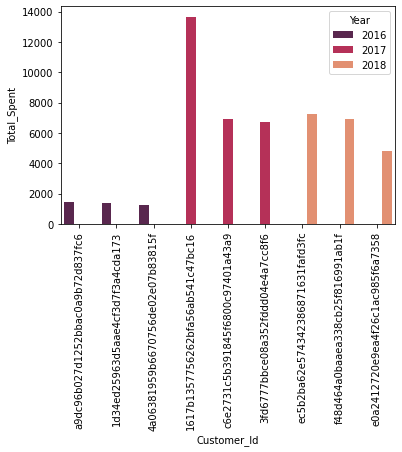

In [31]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Year","Customer_Id","Total_Spent","rank"])
sns.barplot(x = "Customer_Id", y = "Total_Spent", data = df, hue = "Year", palette= 'rocket')
plt.xticks(rotation = 90)
plt.show()